In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
data = pd.read_excel("/content/cucumbar.xlsx")

In [ ]:
data.head()


,State Name,District Name,Market Name,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Tamil Nadu,Vellore,Katpadi(Uzhavar Santhai),0.13,1200,1200,1200,2012-05-16
1,Tamil Nadu,Vellore,Katpadi(Uzhavar Santhai),0.03,1200,1200,1200,2012-05-15
2,Tamil Nadu,Vellore,Katpadi(Uzhavar Santhai),0.08,1200,1200,1200,2012-05-14
3,Tamil Nadu,Vellore,Katpadi(Uzhavar Santhai),0.18,1800,1800,1800,2012-05-11
4,Tamil Nadu,Vellore,Katpadi(Uzhavar Santhai),0.09,1200,1200,1200,2012-05-10


In [ ]:
data.tail()

,State Name,District Name,Market Name,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
376,Tamil Nadu,Vellore,Katpadi(Uzhavar Santhai),0.01,1000,1000,1000,2010-03-12
377,Tamil Nadu,Vellore,Katpadi(Uzhavar Santhai),0.02,1000,1000,1000,2010-03-11
378,Tamil Nadu,Vellore,Katpadi(Uzhavar Santhai),0.01,800,800,800,2010-03-10
379,Tamil Nadu,Vellore,Katpadi(Uzhavar Santhai),0.02,800,800,800,2010-03-09
380,Tamil Nadu,Vellore,Katpadi(Uzhavar Santhai),0.03,800,800,800,2010-03-08


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State Name                 381 non-null    object        
 1   District Name              381 non-null    object        
 2   Market Name                381 non-null    object        
 3   Arrivals (Tonnes)          381 non-null    float64       
 4   Min Price (Rs./Quintal)    381 non-null    int64         
 5   Max Price (Rs./Quintal)    381 non-null    int64         
 6   Modal Price (Rs./Quintal)  381 non-null    int64         
 7   Reported Date              381 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 23.9+ KB


In [ ]:
data = data.dropna()

data['Reported Date'] = pd.to_datetime(data['Reported Date']).astype(int)

In [ ]:
features = ['Arrivals (Tonnes)', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)', 'Reported Date']
target = 'Modal Price (Rs./Quintal)'

In [ ]:
train, test = train_test_split(data, test_size=0.5, random_state=42)

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

     Actual Price  Predicted Price
266           600       599.515303
192           600       593.898327
46           1000      1000.319885
55           1000       996.203044
57           1400      1399.676083
..            ...              ...
165          1000       994.233590
63           1000      1001.277545
249          1000      1004.507680
280          1200      1204.088883
357          1600      1598.536970

[77 rows x 2 columns]
Mean Squared Error: 2.1667969762634054


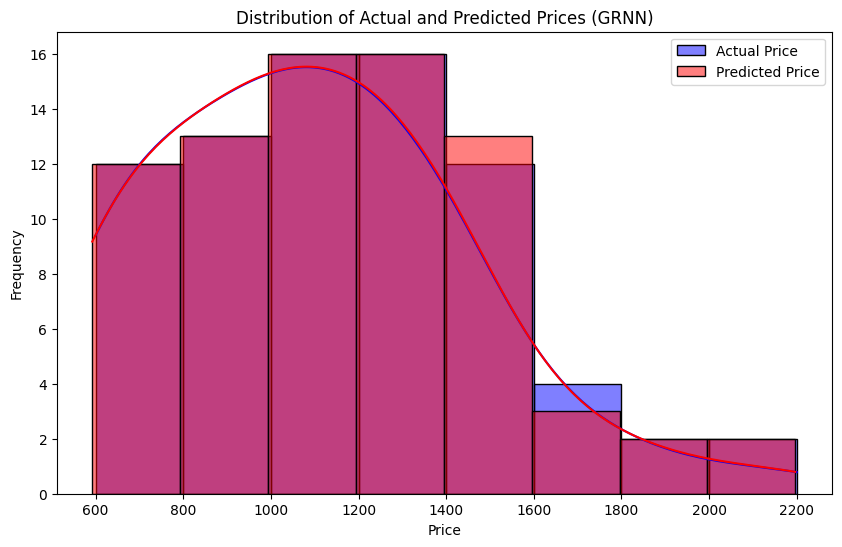

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

# Define a pipeline with scaler and MLPRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLPRegressor(max_iter=1000, random_state=42))
])

# Define hyperparameters to tune
param_grid = {
    'regressor__hidden_layer_sizes': [(100,), (100, 90), (100, 50, 25)],
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'regressor__activation': ['relu', 'tanh']
}

# Define Mean Squared Error as the scoring metric for GridSearchCV
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=5)
grid_search.fit(train[features], train[target])

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(test[features])

comparison_df = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})
print(comparison_df)
comparison_data = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})
mse = mean_absolute_error(test[target], predictions)
print("Mean Squared Error:", mse)
plt.figure(figsize=(10, 6))
sns.histplot(comparison_data['Actual Price'], kde=True, color='blue', label='Actual Price')
sns.histplot(comparison_data['Predicted Price'], kde=True, color='red', label='Predicted Price')
plt.title('Distribution of Actual and Predicted Prices (GRNN)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

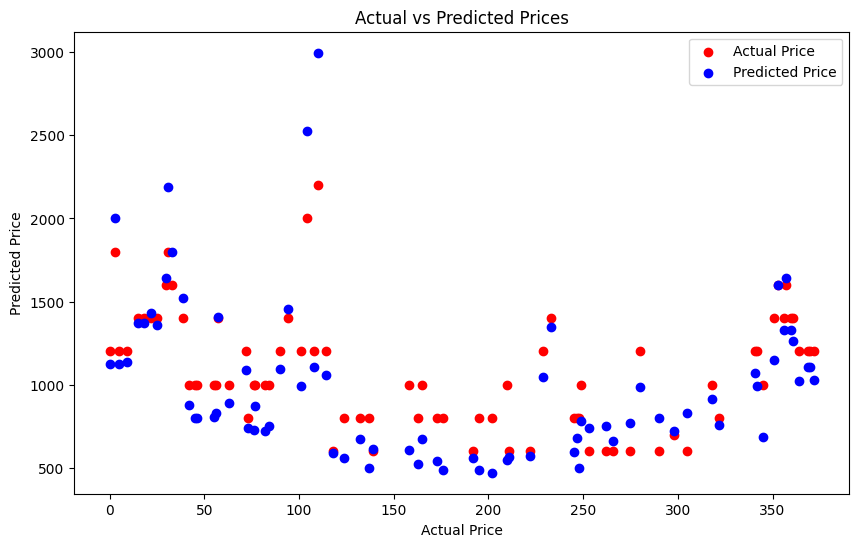

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test.index, test[target], color='red', label='Actual Price')
plt.scatter(test.index, predictions, color='blue', label='Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

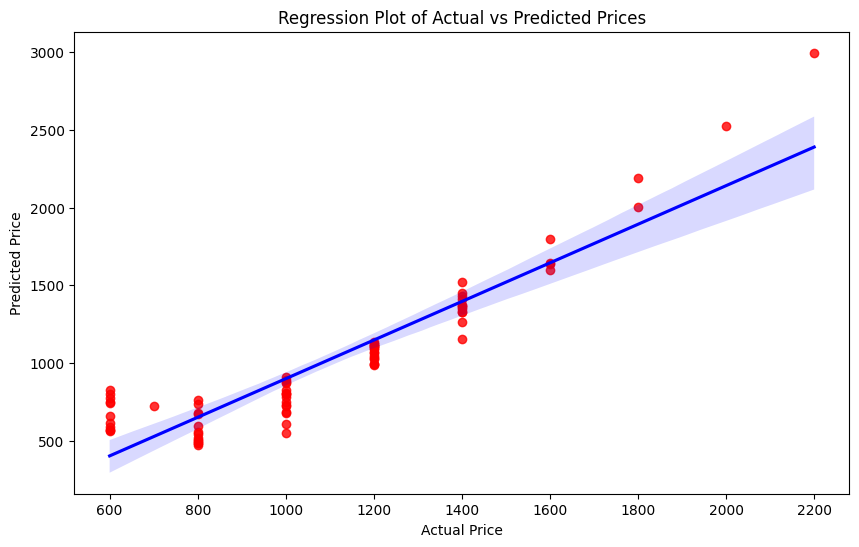

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual Price', y='Predicted Price', data=comparison_df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Regression Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

<ipython-input-15-1a46af3fffc5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(comparison_df['Actual Price'], hist=False, color="blue", label="Actual Price")
<ipython-input-15-1a46af3fffc5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comparison_df['Predicted Price'

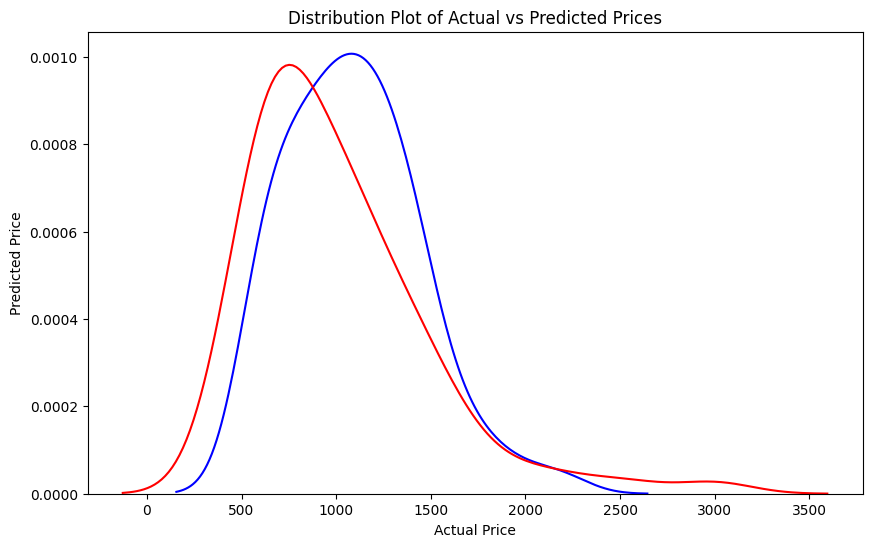

In [ ]:
plt.figure(figsize=(10,6))
ax1 = sns.distplot(comparison_df['Actual Price'], hist=False, color="blue", label="Actual Price")
sns.distplot(comparison_df['Predicted Price'], hist=False, color="red", label="Predicted Price" , ax=ax1)
plt.title('Distribution Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


In [ ]:
model1 = GradientBoostingRegressor()
model1.fit(train_scaled, train[target])

GradientBoostingRegressor()

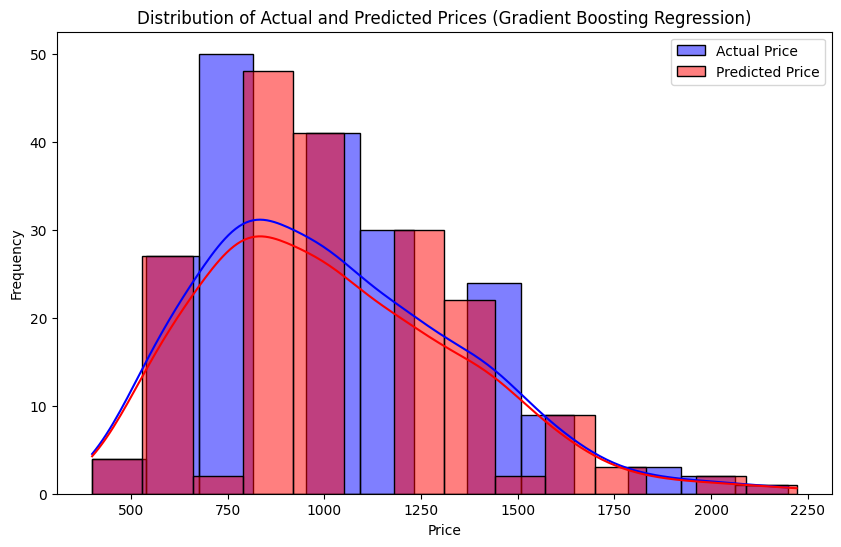

Mean Absolute Error: 0.23099357678818197


In [ ]:
predictions = model1.predict(test_scaled)

# Create a DataFrame for actual and predicted values
comparison_data = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})

# Plotting the distributional graph
plt.figure(figsize=(10, 6))
sns.histplot(comparison_data['Actual Price'], kde=True, color='blue', label='Actual Price')
sns.histplot(comparison_data['Predicted Price'], kde=True, color='red', label='Predicted Price')
plt.title('Distribution of Actual and Predicted Prices (Gradient Boosting Regression)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate Mean Absolute Error
mae = mean_absolute_error(comparison_data['Actual Price'], comparison_data['Predicted Price'])
print("Mean Absolute Error:", mae)

Mean Absolute Error: 5.063106796116505


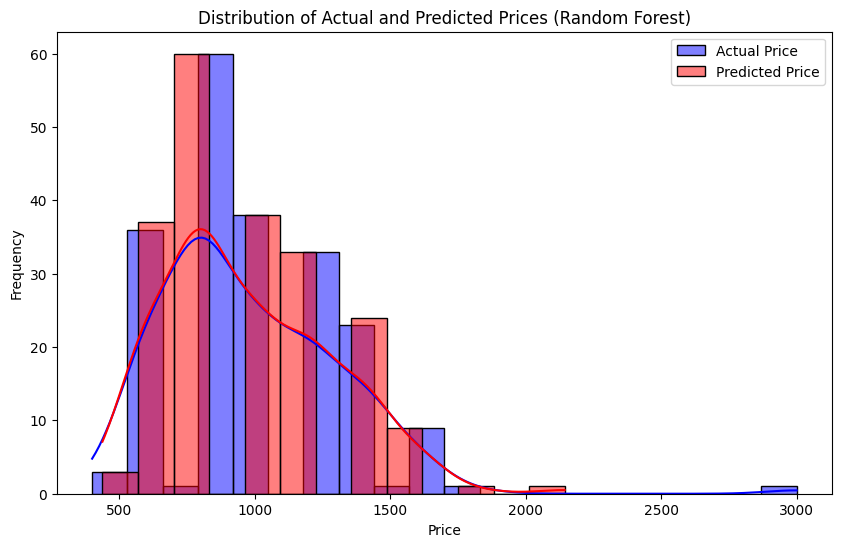

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(train_scaled, train[target])

# Make predictions
predictions = model2.predict(test_scaled)

# Create a DataFrame for actual and predicted values
comparison_data = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})

# Plotting the distributional graph
plt.figure(figsize=(10, 6))
sns.histplot(comparison_data['Actual Price'], kde=True, color='blue', label='Actual Price')
sns.histplot(comparison_data['Predicted Price'], kde=True, color='red', label='Predicted Price')
plt.title('Distribution of Actual and Predicted Prices (Random Forest)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
mae = mean_absolute_error(comparison_data['Actual Price'], comparison_data['Predicted Price'])
print("Mean Absolute Error:", mae)

Mean Absolute Error (Gradient Boosting): 0.23099357678818197
Mean Absolute Error (Random Forest): 1.3141361256544504
Mean Absolute Error (MLP Regressor): 2.956078447107704


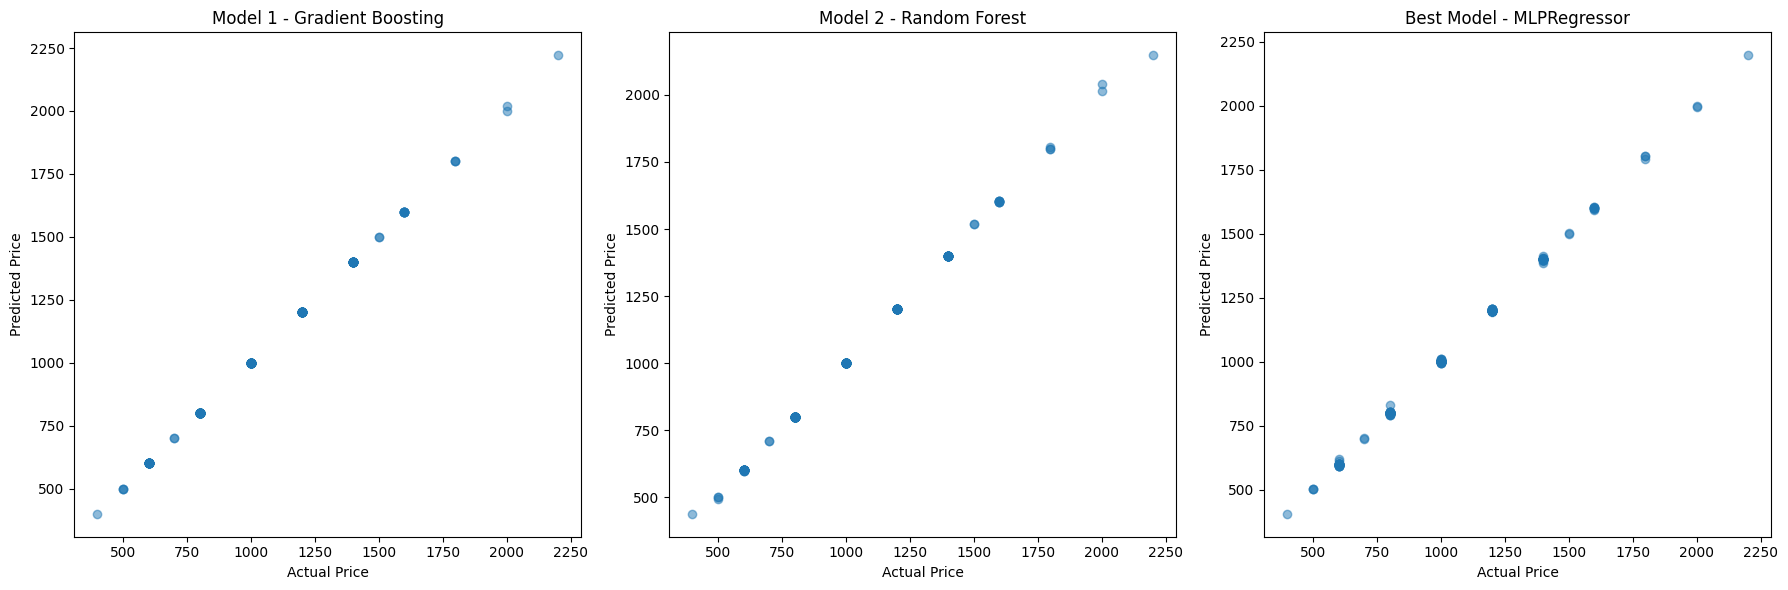

In [ ]:
from sklearn.metrics import mean_absolute_error
predictions_model1 = model1.predict(test_scaled)
predictions_model2 = model2.predict(test_scaled)
predictions_best_model = best_model.predict(test[features])

mae_model1 = mean_absolute_error(test[target], predictions_model1)
print("Mean Absolute Error (Gradient Boosting):", mae_model1)



mae_model2 = mean_absolute_error(test[target], predictions_model2)
print("Mean Absolute Error (Random Forest):", mae_model2)



mae_model3 = mean_absolute_error(test[target], predictions_best_model)
print("Mean Absolute Error (MLP Regressor):", mae_model3)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(test[target], predictions_model1, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 1 - Gradient Boosting')

plt.subplot(1, 3, 2)
plt.scatter(test[target], predictions_model2, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 2 - Random Forest')

plt.subplot(1, 3, 3)
plt.scatter(test[target], predictions_best_model, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Best Model - MLPRegressor')

plt.tight_layout()
plt.show()

Mean Squared Error (Model 1 - Gradient Boosting): 11.736627386315115
Mean Squared Error (Model 2 - Random Forest): 1146.5454545454545
Mean Squared Error (Best Model - MLPRegressor): 8.143794379185646


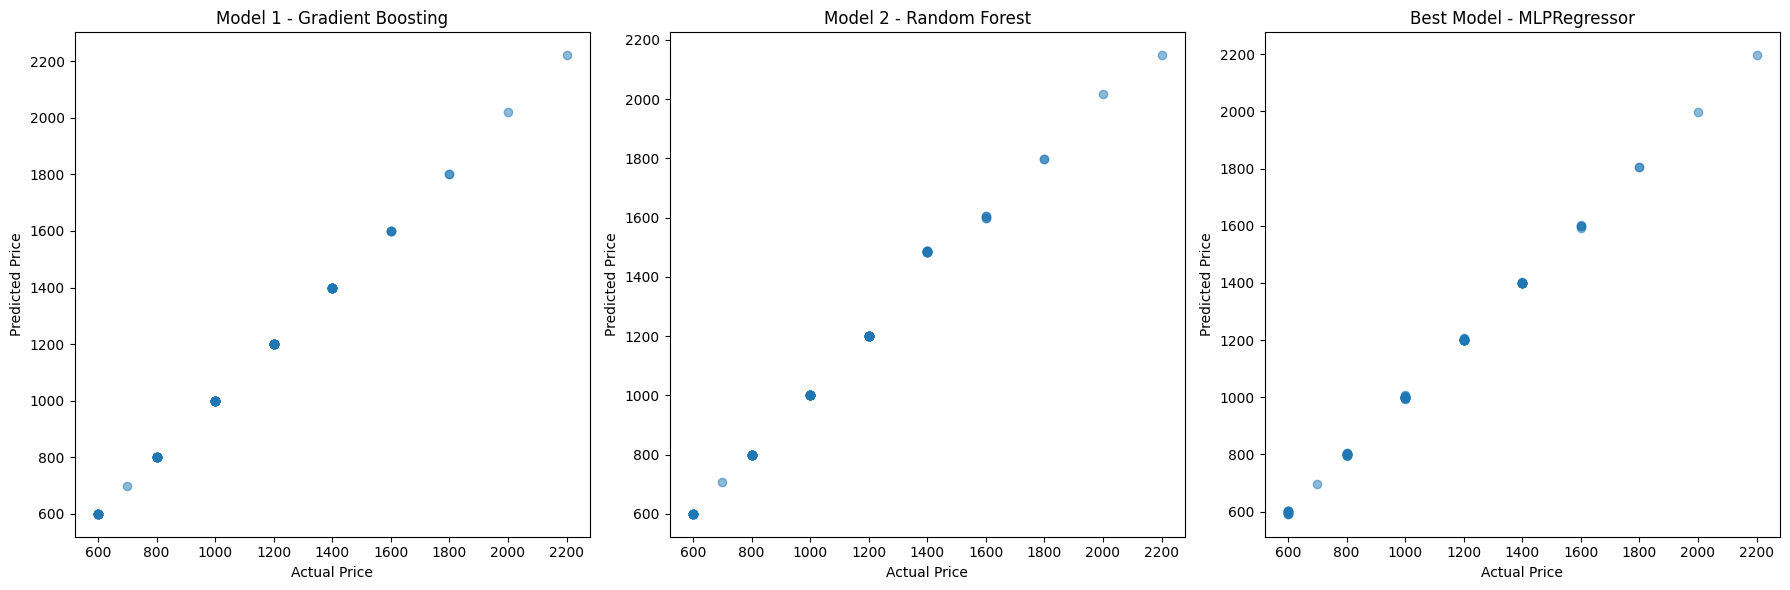

In [ ]:
from sklearn.metrics import mean_squared_error
predictions_model1 = model1.predict(test_scaled)
predictions_model2 = model2.predict(test_scaled)
predictions_best_model = best_model.predict(test[features])

# Calculate mean squared error for each model
mse_model1 = mean_squared_error(test[target], predictions_model1)
mse_model2 = mean_squared_error(test[target], predictions_model2)
mse_best_model = mean_squared_error(test[target], predictions_best_model)

# Print MSE for each model
print("Mean Squared Error (Model 1 - Gradient Boosting):", mse_model1)
print("Mean Squared Error (Model 2 - Random Forest):", mse_model2)
print("Mean Squared Error (Best Model - MLPRegressor):", mse_best_model)

# Optionally, you can plot the actual vs predicted values for each model
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(test[target], predictions_model1, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 1 - Gradient Boosting')

plt.subplot(1, 3, 2)
plt.scatter(test[target], predictions_model2, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 2 - Random Forest')

plt.subplot(1, 3, 3)
plt.scatter(test[target], predictions_best_model, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Best Model - MLPRegressor')

plt.tight_layout()
plt.show()